In [2]:
import sys
sys.path.append('../')

In [3]:
## CIFAR10 DATASET EVALUATION

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import numpy as np
from importlib import reload
import libs.analysis as analysis
import libs.cnn_model as cnn_model

In [46]:
# reloads 
reload(cnn_model)

<module 'libs.cnn_model' from '../libs/cnn_model.py'>

In [9]:
# Parameters
batch_size = 32
epochs = 10
num_classes = 10

img_rows, img_cols = (32, 32)

# Model Destination
model_dest_file = 'cifar10_cnn_model.h5'

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

170500096/170498071 [==============================] - 184s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_val = x_train[49000:]
y_val = y_train[49000:]

x_train = x_train[:49000]
y_train = y_train[:49000]

# Train / Test / Validation Split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


(49000, 32, 32, 3)
(49000, 1)
(10000, 32, 32, 3)
(10000, 1)
(1000, 32, 32, 3)
(1000, 1)


In [6]:
# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_test /= 255
x_val /= 255

In [7]:
# reshape the data
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(49000, 32, 32, 3)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [10]:
# Convert classes to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [ ]:
# if we're loading a model load it!
model = load_model(model_dest_file)

In [11]:
model = cnn_model.build_cnn_model(num_classes, input_shape=(32,32,3), layer2=True)

In [12]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [13]:
# Fit i.e. train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                      verbose=1, validation_data=(x_test, y_test))

Train on 49000 samples, validate on 10000 samples
Epoch 1/10
49000/49000 [==============================] - 735s 15ms/step - loss: 1.7792 - acc: 0.3512 - val_loss: 1.4906 - val_acc: 0.4515
Epoch 2/10
49000/49000 [==============================] - 703s 14ms/step - loss: 1.4688 - acc: 0.4721 - val_loss: 1.3766 - val_acc: 0.5216
Epoch 3/10
49000/49000 [==============================] - 694s 14ms/step - loss: 1.3213 - acc: 0.5284 - val_loss: 1.5272 - val_acc: 0.4728
Epoch 4/10
49000/49000 [==============================] - 744s 15ms/step - loss: 1.2206 - acc: 0.5679 - val_loss: 1.0897 - val_acc: 0.6164
Epoch 5/10
49000/49000 [==============================] - 741s 15ms/step - loss: 1.1293 - acc: 0.6016 - val_loss: 1.1137 - val_acc: 0.6097
Epoch 6/10
49000/49000 [==============================] - 719s 15ms/step - loss: 1.0607 - acc: 0.6267 - val_loss: 1.0504 - val_acc: 0.6306
Epoch 7/10
49000/49000 [==============================] - 721s 15ms/step - loss: 1.0042 - acc: 0.6476 - val_loss: 0.

In [14]:
# Save the model data
model.save(model_dest_file)

In [15]:
# Now Let's evaluate the model
score = model.evaluate(x_val, y_val, verbose=0)

In [16]:
# View the Final Loss and Accuracy scores across all epochs
analysis.print_loss_and_accuracy_from_score(score)

Test loss: 0.8980358486175537
Test accuracy: 0.683


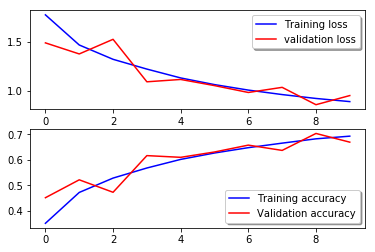

In [17]:
# View the Loss and Accuracy curves across the epochs
analysis.plot_loss_and_accuracy_curves(history, save=True)

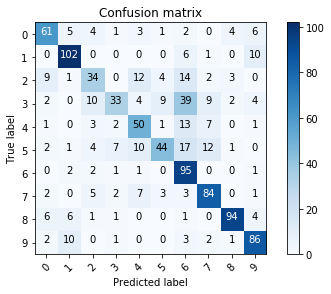

In [18]:
reload(analysis)
y_pred = model.predict(x_val)
analysis.plot_confusion_matrix(y_val, y_pred, classes=range(10), save=True)

In [19]:
reload(analysis)
analysis.print_metrics(y_val, y_pred)

recall: 0.6740645423389724
precision: 0.6898846007202362
accuracy: 0.683
